In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mathurinache_sleep_dataset_path = kagglehub.dataset_download('mathurinache/sleep-dataset')

print('Data source import complete.')

Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-dataset/dataset_2191_sleep.csv


In [ ]:
data=pd.read_csv('/kaggle/input/sleep-dataset/dataset_2191_sleep.csv')
data

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645,3,5,3,3.3
1,1.000,6.6,4.5,42,3,1,3,8.3
2,3.385,44.5,14,60,1,1,1,12.5
3,0.920,5.7,?,25,5,2,3,16.5
4,2547.000,4603.0,69,624,3,5,4,3.9
...,...,...,...,...,...,...,...,...
57,2.000,12.3,7.5,200,3,1,3,5.4
58,0.104,2.5,2.3,46,3,2,2,15.8
59,4.190,58.0,24,210,4,3,4,10.3
60,3.500,3.9,3,14,2,1,1,19.4


In [ ]:
data=data.replace('?',pd.NA)

In [ ]:
data

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645,3,5,3,3.3
1,1.000,6.6,4.5,42,3,1,3,8.3
2,3.385,44.5,14,60,1,1,1,12.5
3,0.920,5.7,<NA>,25,5,2,3,16.5
4,2547.000,4603.0,69,624,3,5,4,3.9
...,...,...,...,...,...,...,...,...
57,2.000,12.3,7.5,200,3,1,3,5.4
58,0.104,2.5,2.3,46,3,2,2,15.8
59,4.190,58.0,24,210,4,3,4,10.3
60,3.500,3.9,3,14,2,1,1,19.4


In [ ]:
data.isnull().sum()

,0
body_weight,0
brain_weight,0
max_life_span,4
gestation_time,4
predation_index,0
sleep_exposure_index,0
danger_index,0
total_sleep,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data=pd.DataFrame(data)
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_weight           51 non-null     float64
 1   brain_weight          51 non-null     float64
 2   max_life_span         51 non-null     object 
 3   gestation_time        51 non-null     object 
 4   predation_index       51 non-null     int64  
 5   sleep_exposure_index  51 non-null     int64  
 6   danger_index          51 non-null     int64  
 7   total_sleep           51 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [ ]:
data.describe()

,body_weight,brain_weight,predation_index,sleep_exposure_index,danger_index
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,224.363078,317.502353,2.843137,2.450980,2.627451
std,988.465573,1018.888421,1.488255,1.578781,1.427736
min,0.005000,0.140000,1.000000,1.000000,1.000000
25%,0.615000,4.500000,2.000000,1.000000,1.000000
50%,3.385000,21.000000,3.000000,2.000000,2.000000
75%,44.245000,172.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,5.000000,5.000000,5.000000


In [ ]:
data.isnull().mode()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,False,False,False,False,False,False,False,False


In [ ]:
data.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645,3,5,3,3.3
1,1.000,6.6,4.5,42,3,1,3,8.3
2,3.385,44.5,14,60,1,1,1,12.5
4,2547.000,4603.0,69,624,3,5,4,3.9
5,10.550,179.5,27,180,4,4,4,9.8


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='total_sleep', ylabel='max_life_span'>

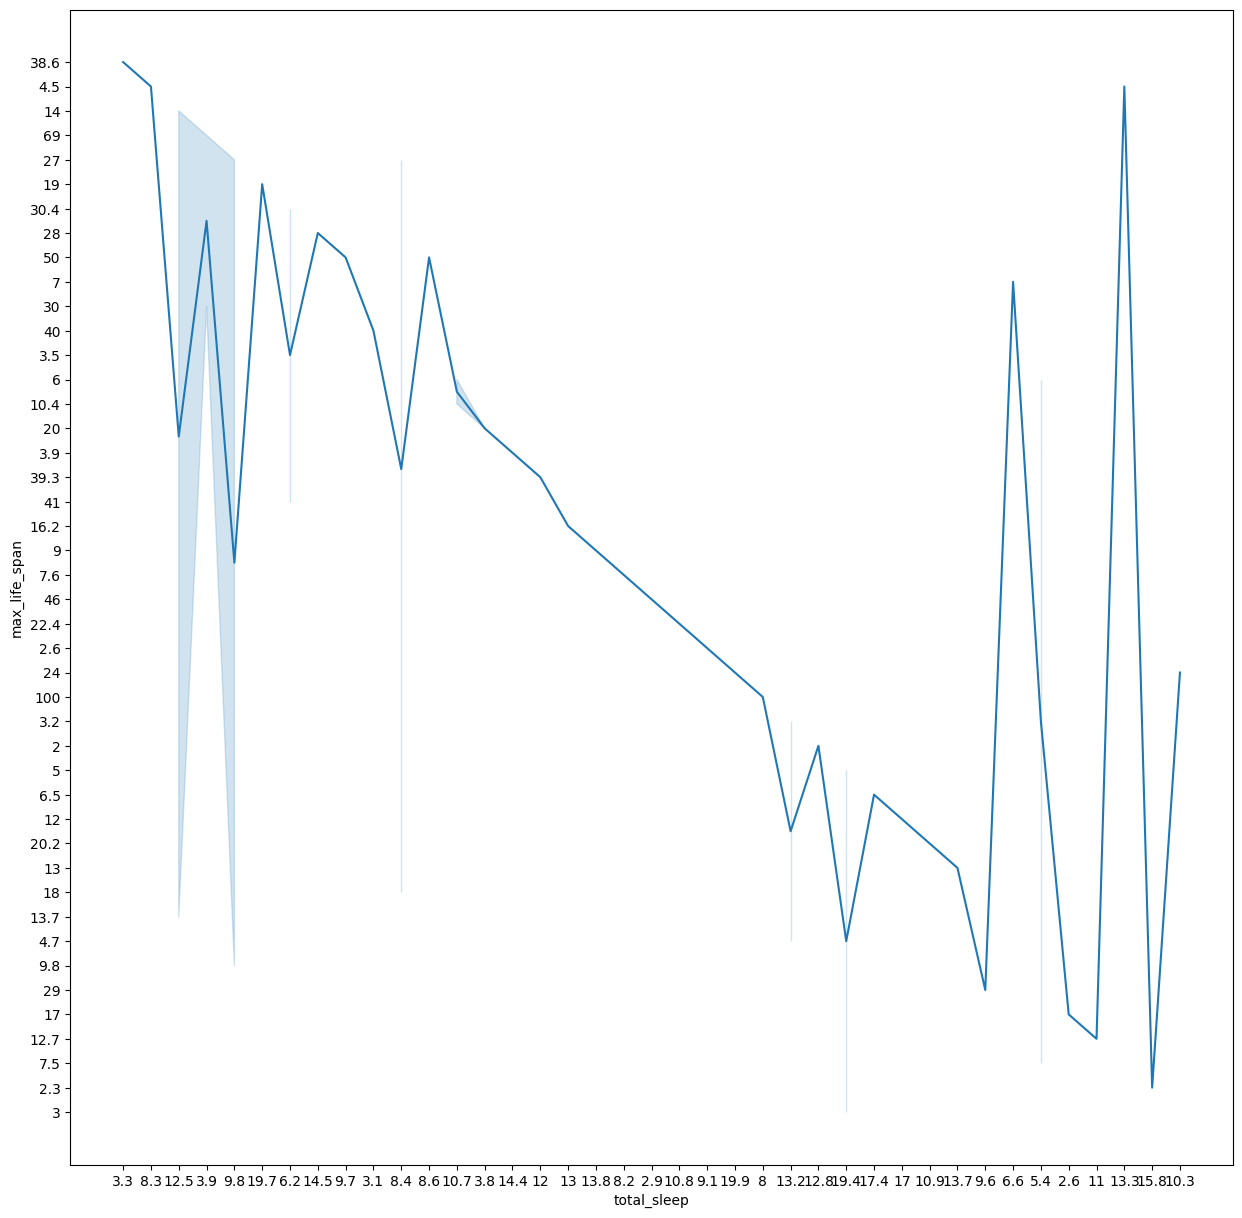

In [ ]:
plt.figure(figsize=(15,15))
sns.lineplot(data=data,x='total_sleep',y='max_life_span')

<Axes: xlabel='total_sleep', ylabel='max_life_span'>

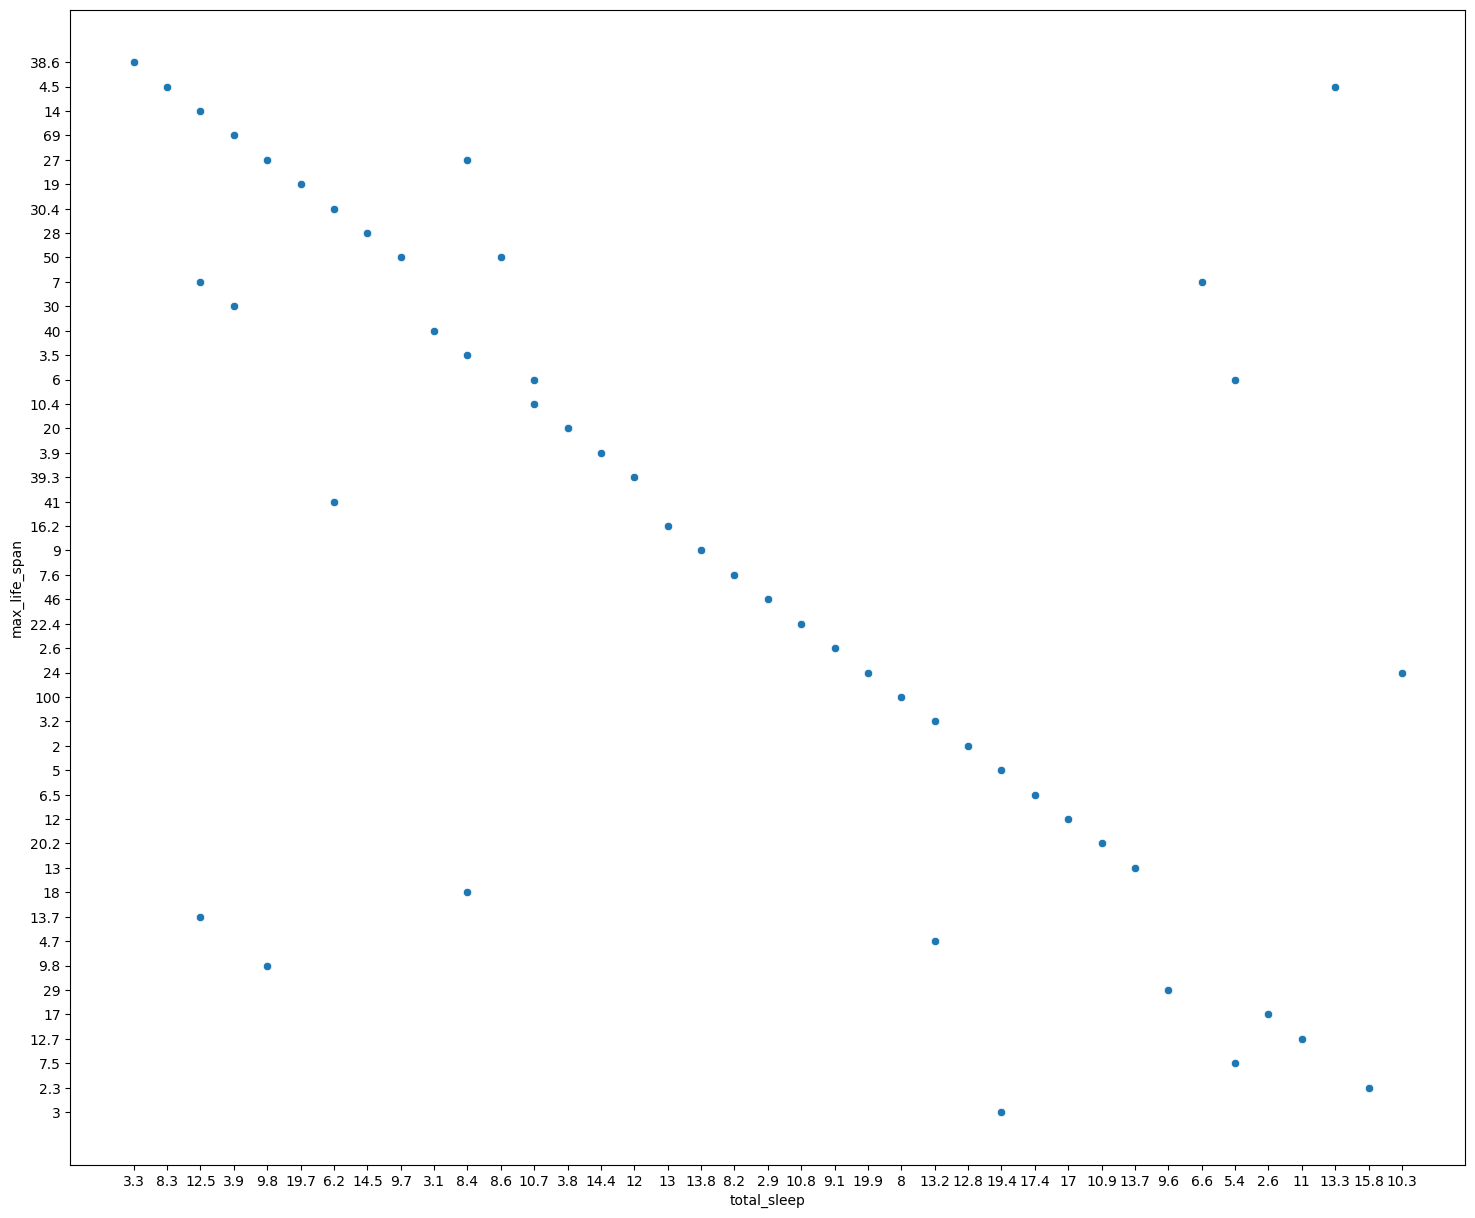

In [ ]:
plt.figure(figsize=(18,15))
sns.scatterplot(data=data,x='total_sleep',y='max_life_span')

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [ ]:
x=data.drop('total_sleep',axis=1)
y=data['total_sleep']

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred=lg.predict(xtest)

In [ ]:
ypred

array(['6.2', '9.8', '3.9', '19.4', '19.4', '3.8', '19.4', '12.5', '3.8',
       '8.6', '5.4'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(ypred,ytest)
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae=mean_absolute_error(ypred,ytest)
mae

3.1818181818181817

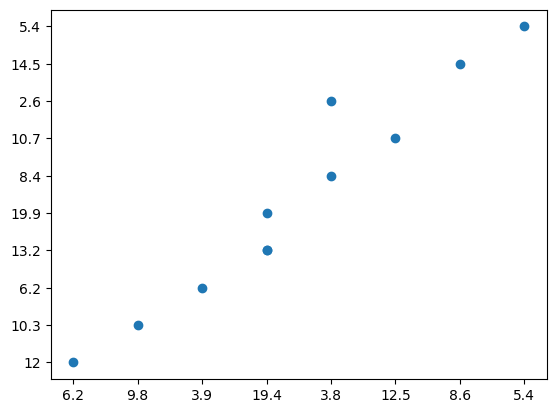

In [ ]:
plt.scatter(ypred,ytest)

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

                      body_weight  brain_weight  max_life_span  \
body_weight              1.000000      0.933989       0.301936   
brain_weight             0.933989      1.000000       0.511910   
max_life_span            0.301936      0.511910       1.000000   
gestation_time           0.689893      0.784608       0.637472   
predation_index          0.048754      0.012694      -0.125542   
sleep_exposure_index     0.351248      0.372845       0.359721   
danger_index             0.121740      0.123911       0.038043   
total_sleep             -0.316712     -0.368365      -0.396263   

                      gestation_time  predation_index  sleep_exposure_index  \
body_weight                 0.689893         0.048754              0.351248   
brain_weight                0.784608         0.012694              0.372845   
max_life_span               0.637472        -0.125542              0.359721   
gestation_time              1.000000         0.140795              0.625433   
predation_

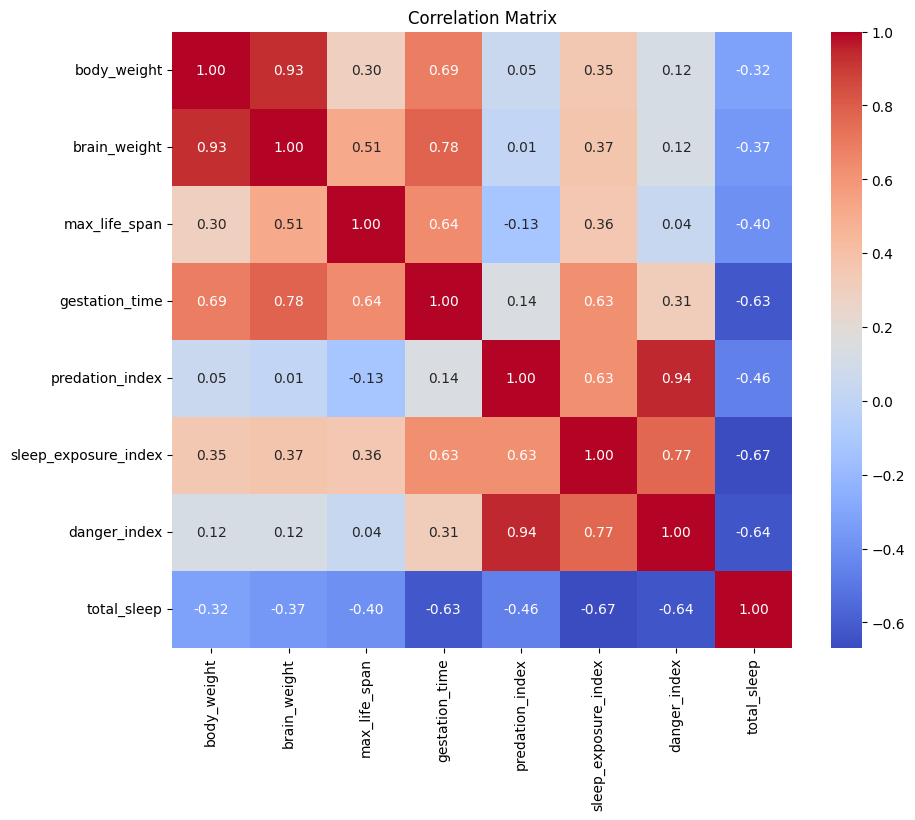

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

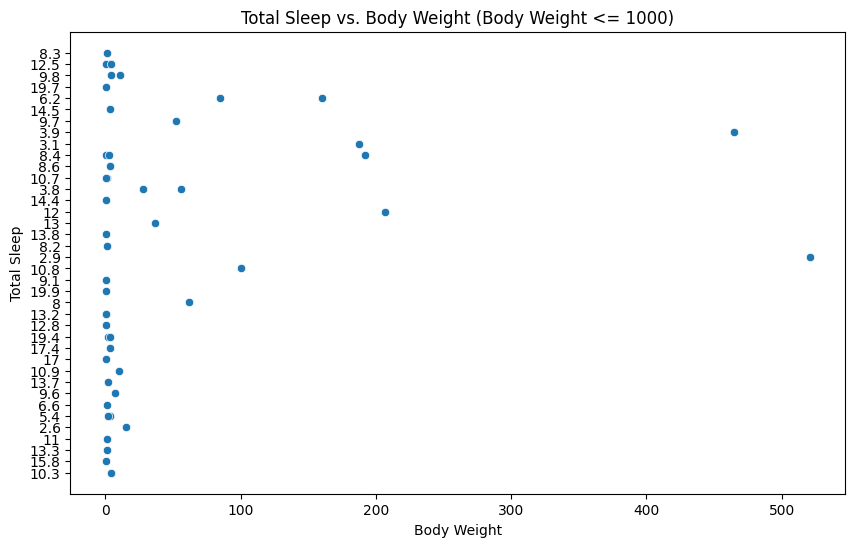

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame

# Filter data
filtered_data = data[data['body_weight'] <= 1000]

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(data=filtered_data, x='body_weight', y='total_sleep')
plt.title('Total Sleep vs. Body Weight (Body Weight <= 1000)')
plt.xlabel('Body Weight')
plt.ylabel('Total Sleep')
plt.show()

In [ ]:
!jupyter nbconvert --to html Sleep_Data.ipynb

[NbConvertApp] Converting notebook Sleep_Data.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 787806 bytes to Sleep_Data.html
